# Risk Classification using SVM

## I. Introduction

This study seeks to investigate the efficacy of Support Vector Machines (SVMs) in addressing the challenges associated with credit card risk assessment.

### 1. Objectives

**Data Exploration:** Our aim is to investigate and analyze the data at our disposal to understand its structure and characteristics. This includes visualizations, statistical analyses, and in-depth data exploration.

**Performance Enhancement:** We seek to improve the performance of our models and algorithms. This involves optimizing hyperparameters and increasing the accuracy and responsiveness of our models.

**Contributing to the Field:** Through our research and development efforts, we aspire to contribute to the fields of machine learning and data analysis by providing new insights and solutions.

**Learning and Development:** We aim to enhance our team's skills and competencies in the realm of data and machine learning through this project.

## II. Importing the nessesary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## III. Exploartory Data Analisys (EDA)

### 1. Loading the raw data

In [2]:
raw_data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/1.csv")
raw_data.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status,Risk Class
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active,LowRisk
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active,LowRisk
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active,LowRisk
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active,LowRisk
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active,LowRisk


### 2. Feature Names and its Datatypes

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      7958 non-null   int64  
 1   Gender                   7958 non-null   object 
 2   Limit                    7958 non-null   int64  
 3   AverageTransactionValue  7958 non-null   float64
 4   MDP                      7958 non-null   float64
 5   Unpaid Daily Principle   7958 non-null   float64
 6   Unpaid Interest          7958 non-null   float64
 7   TotalDuetoReset          7958 non-null   float64
 8   DayDelay                 7958 non-null   int64  
 9   Card Status              7958 non-null   object 
 10  Risk Class               7958 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 684.0+ KB


### 3. Numerical and Categorical Features Spliting

#### 3.1 Numerical Features

In [4]:
raw_data_corr = raw_data.drop("CID", axis=1)
numerical_data = raw_data_corr.select_dtypes(include="number")
numerical_features=numerical_data.columns.tolist()

print(f"There are {len(numerical_features)} numerical features:", "\n")
print(numerical_features)

There are 7 numerical features: 

['Limit', 'AverageTransactionValue', 'MDP', 'Unpaid Daily Principle ', 'Unpaid Interest ', 'TotalDuetoReset', 'DayDelay']


#### 3.2 Categorical Features

In [5]:
categorical_data=raw_data_corr.select_dtypes(include= "object")
categorical_features=categorical_data.columns.tolist()

print(f"There are {len(categorical_features)} numerical features:", "\n")
print(categorical_features)

There are 3 numerical features: 

['Gender', 'Card Status', 'Risk Class']


### 4. Displaying statistical information about the dataset

#### 4.1 Summary Statistics of Numerical Features

In [6]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Limit,7958.0,390.110581,146.301092,300.00,300.0000,300.000,500.0000,1200.00
AverageTransactionValue,7958.0,74.492286,79.291633,1.00,27.5800,46.085,89.6950,1499.97
MDP,7958.0,57.497465,22.103185,0.01,45.0000,45.000,75.0000,180.00
Unpaid Daily Principle,7958.0,350.617620,152.324925,-65.99,292.5000,299.150,399.4125,1538.67
Unpaid Interest,7958.0,19.972495,17.664132,0.00,9.9225,17.305,23.1975,256.24
TotalDuetoReset,7958.0,469.018526,201.137114,-65.83,324.7925,484.770,536.3425,1580.93
DayDelay,7958.0,101.610078,133.674150,0.00,0.0000,27.000,180.0000,544.00


#### 4.2 Summary Statistics of Numerical Features

In [7]:
categorical_data.describe().T

,count,unique,top,freq
Gender,7958,2,Man,5188
Card Status,7958,5,Blocked by The company,4013
Risk Class,7958,3,LowRisk,5028


#### 4.3 Variance of each numerical features


In [8]:
numerical_data.var()

Limit                      21404.009387
AverageTransactionValue     6287.163051
MDP                          488.550768
Unpaid Daily Principle     23202.882773
Unpaid Interest              312.021544
TotalDuetoReset            40456.138735
DayDelay                   17868.778317
dtype: float64

#### 4.4 Skew in numerical features


In [9]:
numerical_data.skew()

Limit                      1.782682
AverageTransactionValue    3.363934
MDP                        1.603335
Unpaid Daily Principle     1.337487
Unpaid Interest            3.467053
TotalDuetoReset            0.803707
DayDelay                   1.138677
dtype: float64

#### 4.5 Histograms

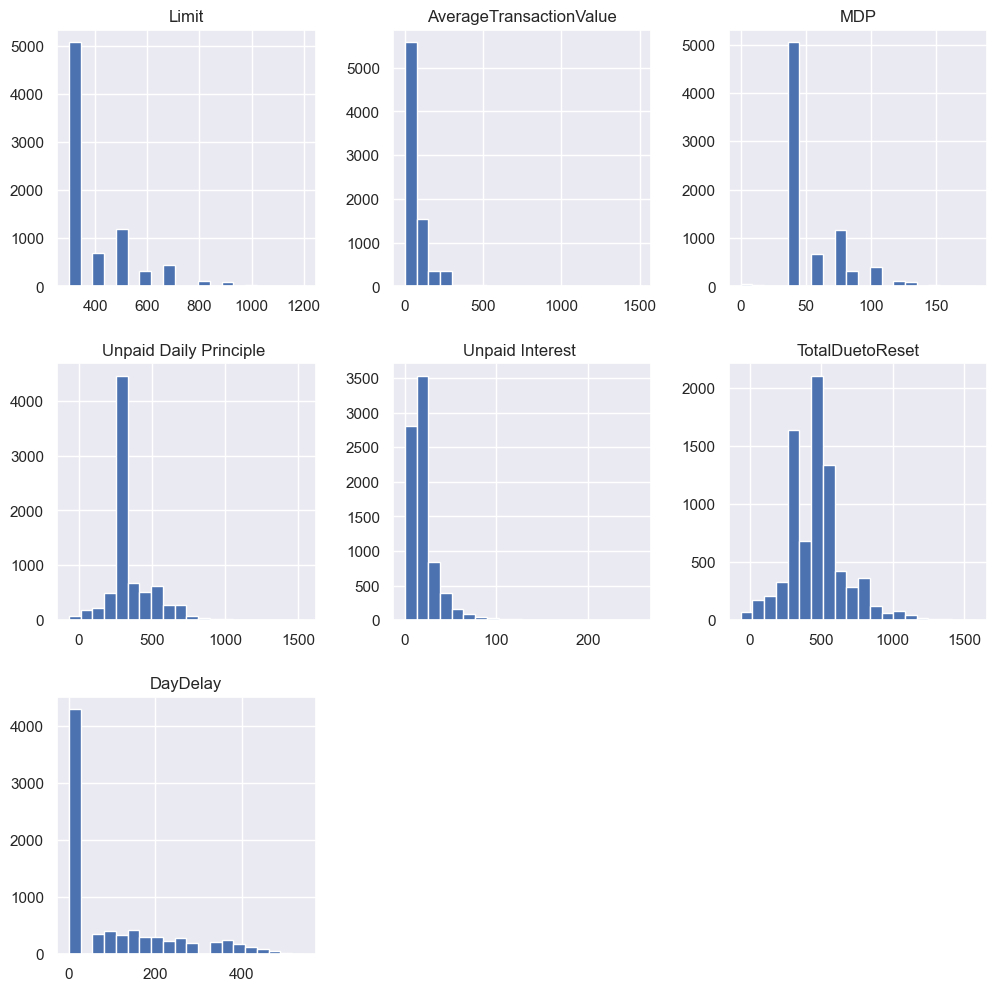

In [10]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

### 5. Checking for unique and missing values

#### 5.1 Unique Values

In [11]:
numerical_data.nunique()

Limit                        10
AverageTransactionValue    5336
MDP                         159
Unpaid Daily Principle     4465
Unpaid Interest            3389
TotalDuetoReset            7115
DayDelay                     19
dtype: int64

#### 5.2 Missing Values

In [12]:
missing_values = raw_data.isnull().sum()
missing_values

CID                        0
Gender                     0
Limit                      0
AverageTransactionValue    0
MDP                        0
Unpaid Daily Principle     0
Unpaid Interest            0
TotalDuetoReset            0
DayDelay                   0
Card Status                0
Risk Class                 0
dtype: int64

### 6. Separating inputs and targets

In [13]:
data_inputs = raw_data.iloc[:, :-1]
data_targets = raw_data.iloc[:, -1]

In [14]:
data_inputs.head()

,CID,Gender,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Card Status
0,14000072,Woman,300,79.35,45.0,267.73,9.69,301.30,0,Active
1,14000075,Man,600,25.64,90.0,396.73,8.88,405.61,0,Active
2,14000077,Woman,700,95.73,105.0,559.34,20.78,636.05,0,Active
3,14000078,Man,500,59.26,75.0,126.96,0.75,127.71,0,Active
4,14000084,Man,300,58.82,45.0,272.37,28.47,300.84,0,Active


In [15]:
data_targets.head()

0    LowRisk
1    LowRisk
2    LowRisk
3    LowRisk
4    LowRisk
Name: Risk Class, dtype: object

### 7. Creating dummy - input variables 

In [16]:
data_inputs_corr = data_inputs.drop("CID", axis=1)
df_features = pd.get_dummies(data_inputs_corr)
df_features.head()

,Limit,AverageTransactionValue,MDP,Unpaid Daily Principle,Unpaid Interest,TotalDuetoReset,DayDelay,Gender_Man,Gender_Woman,Card Status_Active,Card Status_Blocked by Customer,Card Status_Blocked by The company,Card Status_Lost,Card Status_Stolen
0,300,79.35,45.0,267.73,9.69,301.30,0,0,1,1,0,0,0,0
1,600,25.64,90.0,396.73,8.88,405.61,0,1,0,1,0,0,0,0
2,700,95.73,105.0,559.34,20.78,636.05,0,0,1,1,0,0,0,0
3,500,59.26,75.0,126.96,0.75,127.71,0,1,0,1,0,0,0,0
4,300,58.82,45.0,272.37,28.47,300.84,0,1,0,1,0,0,0,0


### 6. Converting the categorical target variable into numerical values - target variable

**0 - Low Risk**

**1 - Middle Risk**

**2 - High Risk**


In [17]:
df_targets = data_targets.astype("category").cat.codes
df_targets.head()

0    1
1    1
2    1
3    1
4    1
dtype: int8

### 7. Check Imbalance in the Data

In [18]:
class_counts = df_targets.value_counts()

columns = ["Class", "Count", "Percentage"]
outcome = [0, 1, 2]  
count = list()
percentage = list()


for val in range(3): 
    count.append(class_counts[val])
    percent = (class_counts[val] / len(df_targets)) * 100
    formatted_percent = f"{percent:.2f}%"  
    percentage.append(formatted_percent)


imbalance_df = pd.DataFrame(list(zip(outcome, count, percentage)), columns=columns)
imbalance_df 

,Class,Count,Percentage
0,0,1598,20.08%
1,1,5028,63.18%
2,2,1332,16.74%


### 8. Exploring Target Variables Distributions 

#### 8.1 Observing the Distribution of RISK CLASSES

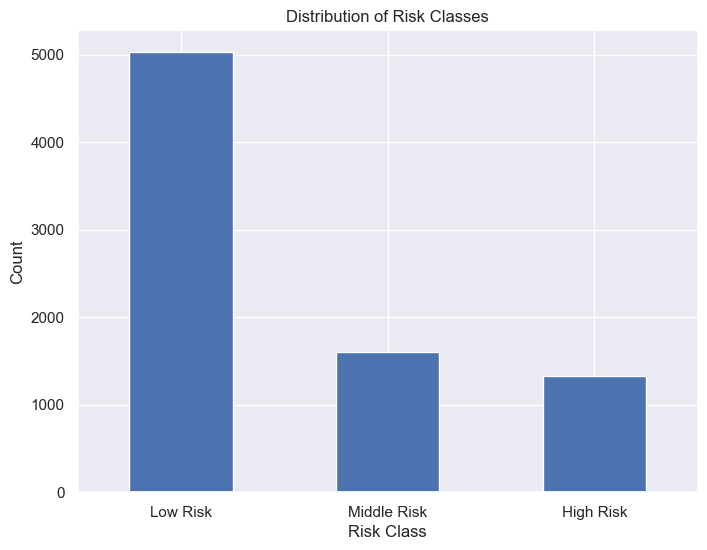

In [19]:
class_counts = raw_data["Risk Class"].value_counts()
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind="bar")
plt.xlabel("Risk Class")
plt.ylabel("Count")
plt.xticks(range(3), ["Low Risk", "Middle Risk", "High Risk"], rotation=0)
plt.title("Distribution of Risk Classes")
plt.show()

#### 8.2 Observing the GENDER Distribution

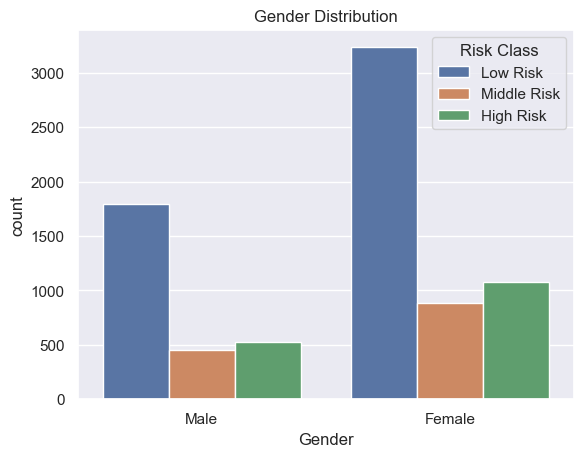

In [20]:
plot = sns.countplot(x="Gender", data=raw_data, hue="Risk Class")
plot.set_xticklabels(["Male", "Female"])
plt.legend(title="Risk Class", labels=["Low Risk", "Middle Risk", "High Risk"])
plt.title("Gender Distribution")
plt.show()


#### 8.3 Observing the LIMIT Distribution

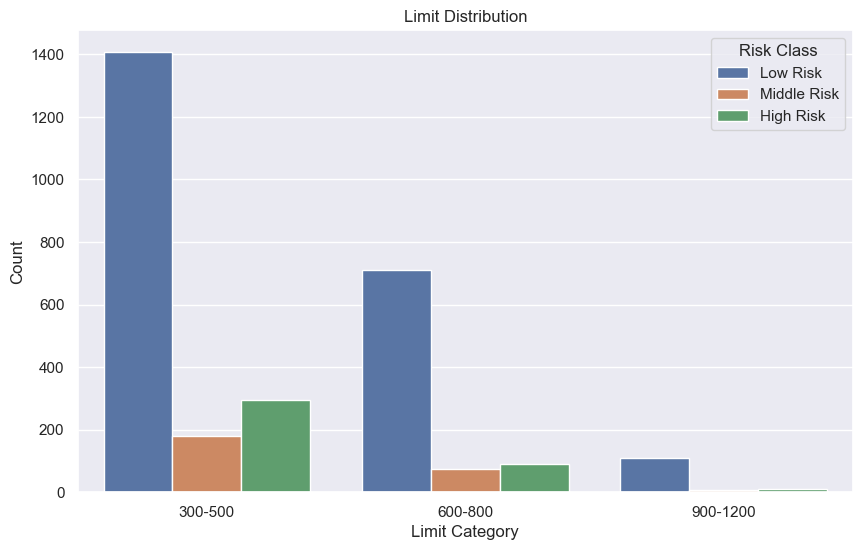

In [21]:
raw_data["Limit Category"] = pd.cut(raw_data["Limit"], bins=[300, 500, 800, 1200], labels=["300-500", "600-800", "900-1200"])
plt.figure(figsize=(10, 6))
sns.countplot(x="Limit Category", hue="Risk Class", data=raw_data)
plt.legend(title="Risk Class", labels=["Low Risk", "Middle Risk", "High Risk"])
plt.xlabel("Limit Category")
plt.ylabel("Count")
plt.title("Limit Distribution")
plt.show()

### 9. Exploring Numerical Features Distribution 

#### 9.1 Denisty Plots

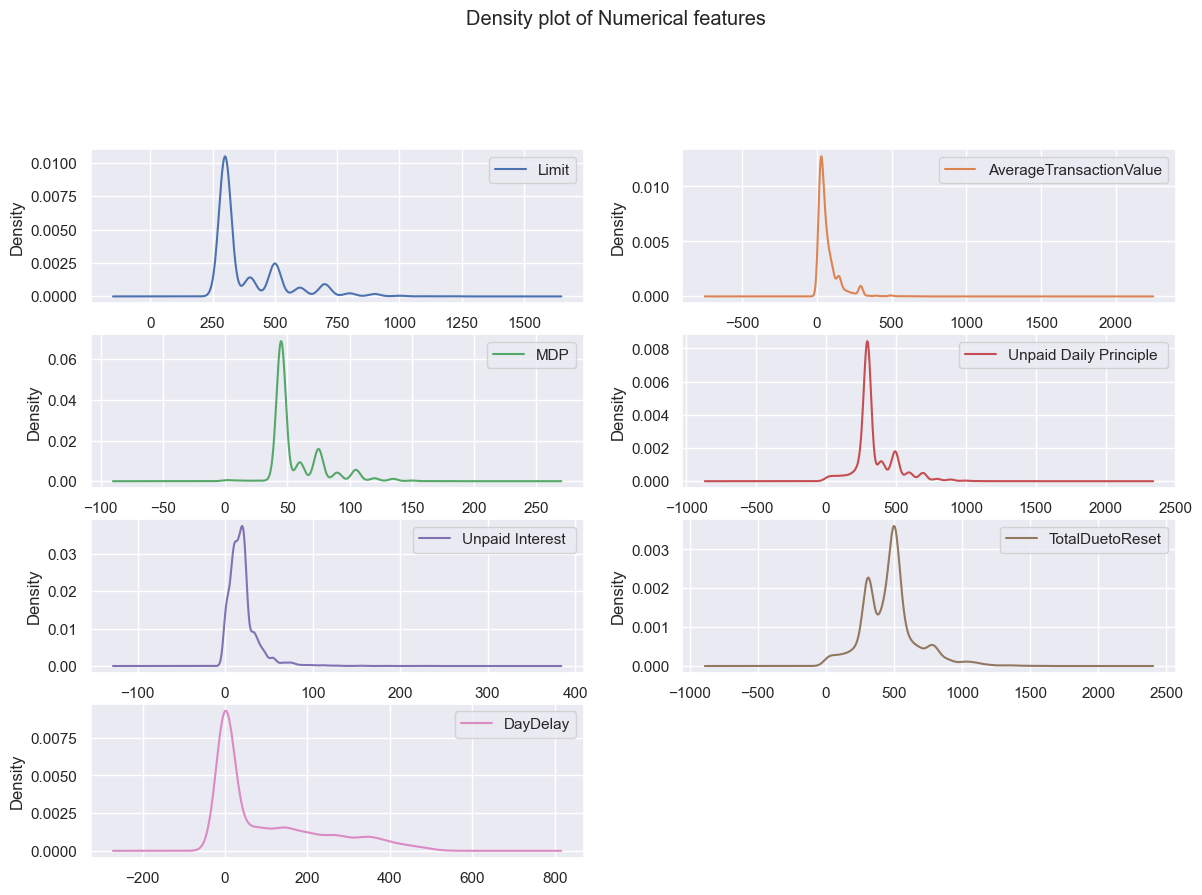

In [61]:
raw_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

#### 9.2  Distribution Plots (Distplot)

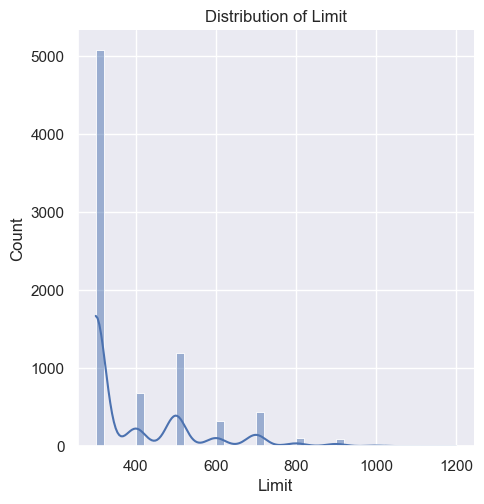

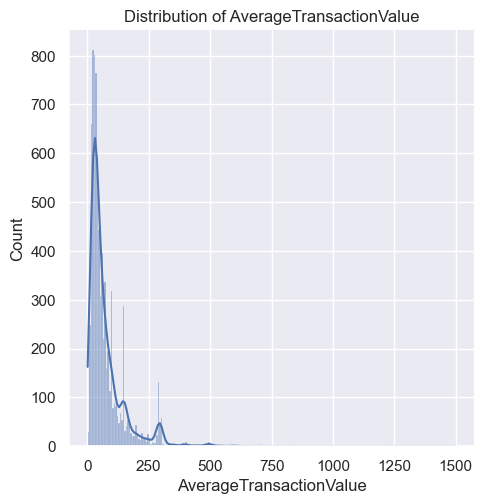

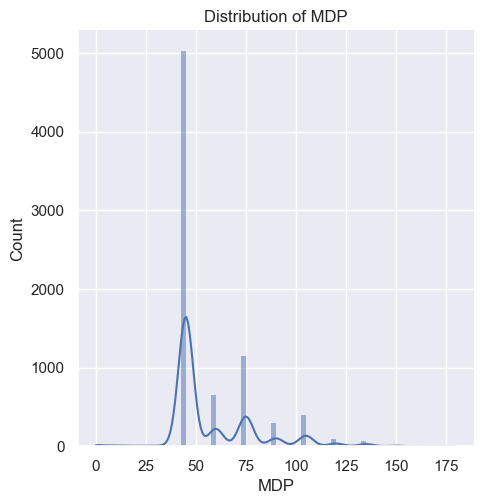

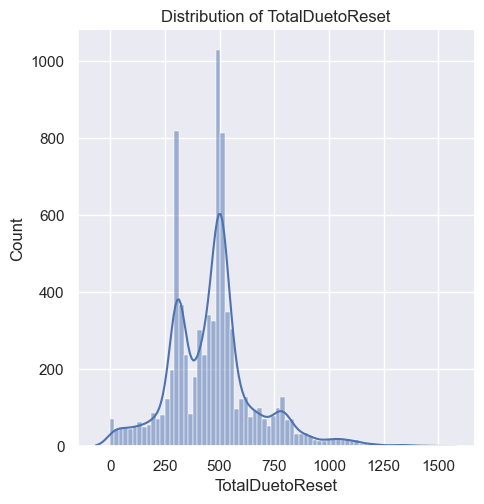

In [57]:
attributes = ["Limit", "AverageTransactionValue", "MDP", "TotalDuetoReset"]
for attr in attributes:
    sns.displot(raw_data[attr], kde=True) 
    plt.title(f'Distribution of {attr}')
    plt.show()
    

#### 9.3 Box Plots

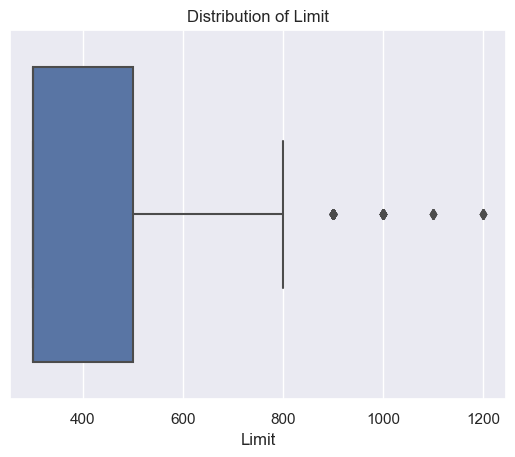

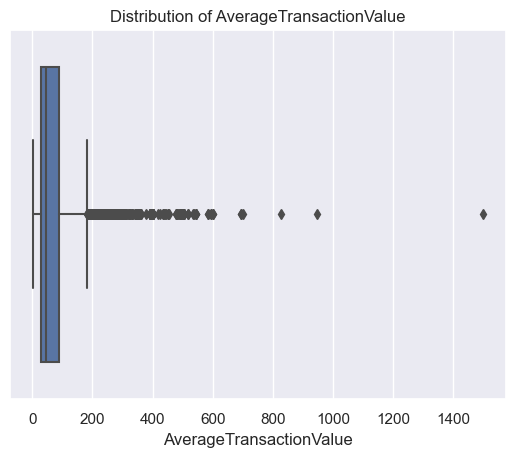

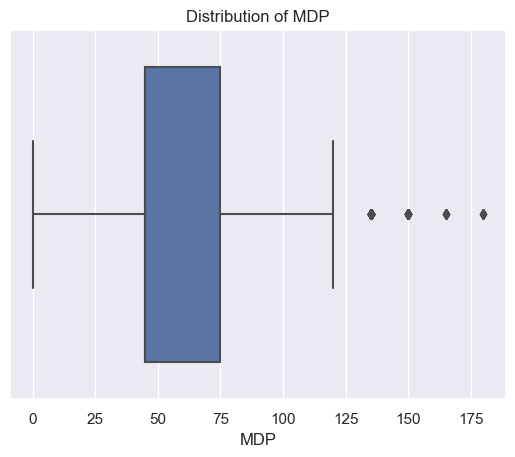

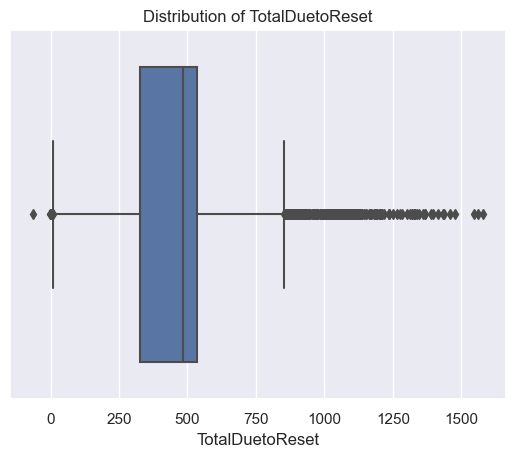

In [60]:
attributes = ["Limit", "AverageTransactionValue", "MDP", "TotalDuetoReset"]
for attr in attributes:
    sns.boxplot(data=raw_data, x=attr)
    plt.title(f'Distribution of {attr}')
    plt.show()
    

### 7. Correlation Heatmap of Features

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_3472\3995711524.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(),annot = True, cmap='mako')


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

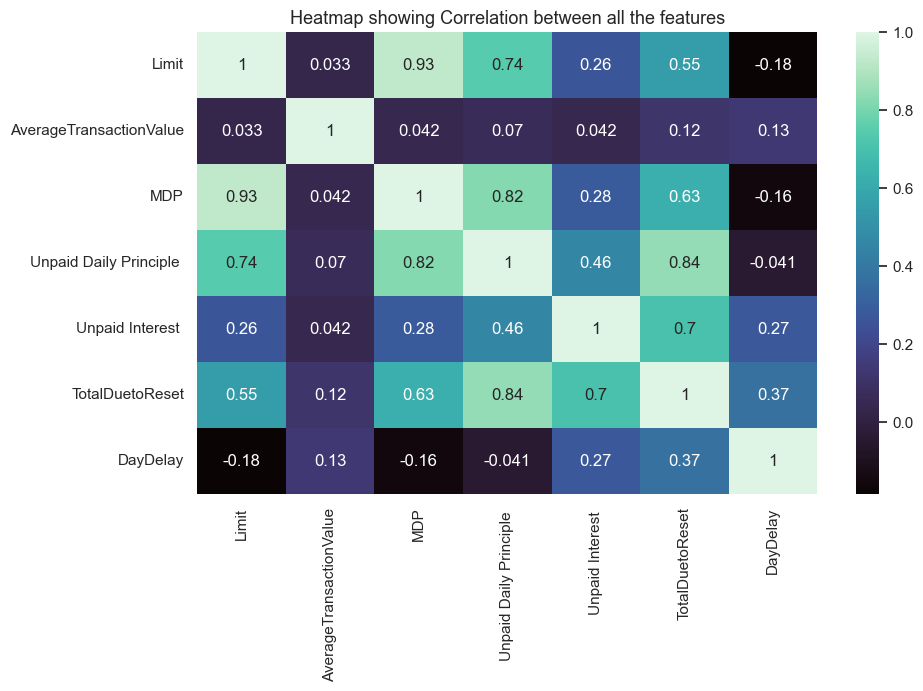

In [22]:
raw_data.drop(columns=["CID"], inplace=True)
plt.figure(figsize=(10,6))
plt.title("Heatmap showing Correlation between all the features", fontsize=13)
sns.heatmap(raw_data.corr(),annot = True, cmap='mako')

## IV. Data Preparation

### 1. Splitting the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=42)

### 2. Feature Scalling

#### 2.1 Standart Scalling (Z-Score)

In [25]:
scaler_S = StandardScaler()

In [26]:
X_train_S = scaler_S.fit_transform(X_train)
X_train_S

array([[-0.60951612,  1.59762358, -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       [-0.60951612, -0.54411961, -0.557763  , ..., -1.0190312 ,
        -0.05752993, -0.0469471 ],
       [ 0.07931392, -0.55641246,  0.12557005, ..., -1.0190312 ,
        -0.05752993, -0.0469471 ],
       ...,
       [ 0.07931392, -0.76995313,  0.12557005, ..., -1.0190312 ,
        -0.05752993, -0.0469471 ],
       [-0.60951612, -0.18648652, -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       [-0.60951612,  1.28497976, -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ]])

In [27]:
X_test_S = scaler_S.transform(X_test)
X_test_S

array([[-0.60951612,  2.75239067, -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       [ 1.456974  , -0.29560137,  1.49223616, ..., -1.0190312 ,
        -0.05752993, -0.0469471 ],
       [ 0.07931392,  1.47494858,  0.12557005, ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       ...,
       [-0.60951612, -0.63207049, -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       [-0.60951612,  0.3064946 , -0.557763  , ...,  0.98132422,
        -0.05752993, -0.0469471 ],
       [-0.60951612,  1.29625876, -0.557763  , ..., -1.0190312 ,
        -0.05752993, -0.0469471 ]])

#### 2.2 MinMax Scaling

In [28]:
scaler_MM = MinMaxScaler(feature_range=(-1,1)).fit(X_train)                         

In [29]:
X_train_MM = scaler_MM.transform(X_train)
X_train_MM

array([[-1.        , -0.73357706, -0.50008334, ...,  1.        ,
        -1.        , -1.        ],
       [-1.        , -0.95906522, -0.50008334, ..., -1.        ,
        -1.        , -1.        ],
       [-0.77777778, -0.96035945, -0.33340741, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.77777778, -0.98284155, -0.33340741, ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.9214127 , -0.50008334, ...,  1.        ,
        -1.        , -1.        ],
       [-1.        , -0.76649299, -0.50008334, ...,  1.        ,
        -1.        , -1.        ]])

In [30]:
X_test_MM = scaler_MM.transform(X_test)
X_test_MM

array([[-1.00000000e+00, -6.12000240e-01, -5.00083338e-01, ...,
         1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-3.33333333e-01, -9.32900592e-01, -5.55586421e-05, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-7.77777778e-01, -7.46492592e-01, -3.33407412e-01, ...,
         1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       ...,
       [-1.00000000e+00, -9.68324916e-01, -5.00083338e-01, ...,
         1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -8.69510397e-01, -5.00083338e-01, ...,
         1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -7.65305510e-01, -5.00083338e-01, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

## V. Model Initialization and Performance Evaluation

### 1. SVM Model Deployment 

#### 1.2 SVM Model Deployment with Standar Scaler 

In [31]:
svc_SS = SVC()

In [32]:
svc_SS.fit(X_train_S, y_train)

SVC()

In [33]:
pred_SVM_SS = svc_SS.predict(X_test_S) 

#### 1.2 SVM Model Deployment with MinMax Scaler Scaler 

In [34]:
svc_MM = SVC()

In [35]:
svc_MM.fit(X_train_MM, y_train)

SVC()

In [36]:
pred_SVM_MM = svc_MM.predict(X_test_MM) 

### 2. SVM Model Evaluation

#### 2.1 SVM with Standart Scaler - Model Evaluation 

In [37]:
conf_matrix_SVM_SS = confusion_matrix(y_test, pred_SVM_SS)

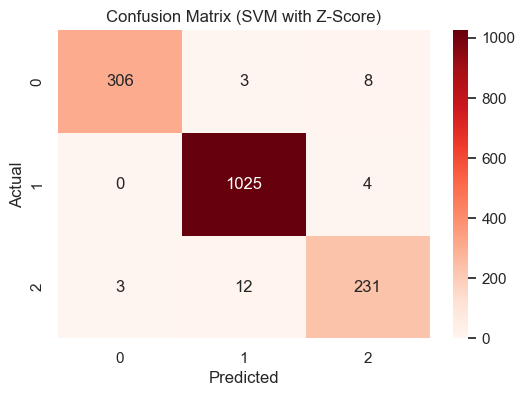

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_SVM_SS, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM with Z-Score)")
plt.show()

In [39]:
report_SVM_SS = classification_report(y_test, pred_SVM_SS)

In [40]:
print("\nClassification Report (SVM with Z-Score):")
print(report_SVM_SS)


Classification Report (SVM with Z-Score):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       317
           1       0.99      1.00      0.99      1029
           2       0.95      0.94      0.94       246

    accuracy                           0.98      1592
   macro avg       0.98      0.97      0.97      1592
weighted avg       0.98      0.98      0.98      1592



#### 2.2 SVM with MinMax Scaler - Model Evaluation 

In [41]:
conf_matrix_SVM_MM = confusion_matrix(y_test, pred_SVM_MM)

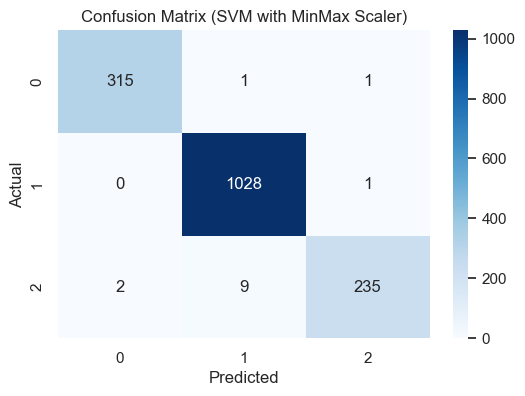

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_SVM_MM, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM with MinMax Scaler)")
plt.show()

In [43]:
report_SVM_MM = classification_report(y_test, pred_SVM_MM)

In [44]:
print("\nClassification Report (SVM with MinMax Scaler):")
print(report_SVM_MM)


Classification Report (SVM with MinMax Scaler):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.99      1.00      0.99      1029
           2       0.99      0.96      0.97       246

    accuracy                           0.99      1592
   macro avg       0.99      0.98      0.99      1592
weighted avg       0.99      0.99      0.99      1592



### 3. Hyperparameter Tuning with GridSearchCV
#### Choosing the best kernel and optimal C parameter based on Cross Validation of the training data

In [45]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
] 

In [46]:
scores = ["precision", "recall", "f1-score", "accuracy"] 

In [47]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svc_MM, tuned_parameters, scoring="f1_macro")
    clf.fit(X_train_MM, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test_MM)
    print(classification_report(y_true, y_pred))
    print() 


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.996 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.996 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
0.993 (+/-0.004) for {'C': 1, 'kernel': 'poly'}
0.995 (+/-0.001) for {'C': 10, 'kernel': 'poly'}
0.632 (+/-0.034) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.257 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.953 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.634 (+/-0.038) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       1.00      1.00      1.00      1029
           2       0.99      0.98      0.98       246

    accuracy                           